In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving HousingPrice.csv to HousingPrice.csv


# 1. Import data from HousingPrice.csv

In [4]:
data = pd.read_csv("./HousingPrice.csv")
data.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,PRICE
0,38.35180,0.0,18.1,khong giap song,0.693,5.453,100.0,1.4896,24,20.2,30.59,5.0
1,67.92080,0.0,18.1,khong giap song,0.693,5.683,100.0,1.4254,24,20.2,22.98,5.0
2,25.04610,0.0,18.1,khong giap song,0.693,5.987,100.0,1.5888,24,20.2,26.77,5.6
3,9.91655,0.0,18.1,khong giap song,0.693,5.852,77.8,1.5004,24,20.2,29.97,6.3
4,45.74610,0.0,18.1,khong giap song,0.693,4.519,100.0,1.6582,24,20.2,36.98,7.0


## 2. Check missing value (NaN)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     508 non-null    float64
 1   ZN       508 non-null    float64
 2   INDUS    508 non-null    float64
 3   RIVER    508 non-null    object 
 4   NOX      508 non-null    float64
 5   RM       508 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      508 non-null    float64
 8   RAD      508 non-null    int64  
 9   PTRATIO  508 non-null    float64
 10  LSTAT    508 non-null    float64
 11  PRICE    508 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 47.8+ KB


In [6]:
for col in data.columns:
    missing_value = data[col].isna().sum()
    print(f"Column {col} have: {missing_value} NaN")

Column CRIM have: 0 NaN
Column ZN have: 0 NaN
Column INDUS have: 0 NaN
Column RIVER have: 0 NaN
Column NOX have: 0 NaN
Column RM have: 0 NaN
Column AGE have: 0 NaN
Column DIS have: 0 NaN
Column RAD have: 0 NaN
Column PTRATIO have: 0 NaN
Column LSTAT have: 0 NaN
Column PRICE have: 0 NaN


Conclusion: Không có giá trị NaN nào, không có giá trị nào bị thiếu

## 3. Đưa giá trị cột RIVER về thành 0,1: "khong giap song":0, "giap song": 1

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["giap song", "khong giap song"])
data.RIVER = le.transform(data.RIVER)
data.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,PRICE
0,38.35180,0.0,18.1,1,0.693,5.453,100.0,1.4896,24,20.2,30.59,5.0
1,67.92080,0.0,18.1,1,0.693,5.683,100.0,1.4254,24,20.2,22.98,5.0
2,25.04610,0.0,18.1,1,0.693,5.987,100.0,1.5888,24,20.2,26.77,5.6
3,9.91655,0.0,18.1,1,0.693,5.852,77.8,1.5004,24,20.2,29.97,6.3
4,45.74610,0.0,18.1,1,0.693,4.519,100.0,1.6582,24,20.2,36.98,7.0


In [8]:
data.RAD = data.RAD.astype("category")
data.RIVER = data.RIVER.astype("category")

In [9]:
data.ZN.value_counts(normalize=True)

,proportion
ZN,
0.0,0.736220
20.0,0.041339
80.0,0.029528
25.0,0.019685
22.0,0.019685
12.5,0.019685
40.0,0.013780
30.0,0.011811
45.0,0.011811


In [10]:
features=["CRIM", "RIVER","RM", "AGE", "DIS", "RAD", "PTRATIO", "LSTAT", "PRICE"]

In [11]:
data[["CRIM","RM", "AGE", "DIS", "PTRATIO", "LSTAT", "PRICE"]].describe()

,CRIM,RM,AGE,DIS,PTRATIO,LSTAT,PRICE
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.617696,6.259583,68.683661,3.789024,18.454921,12.642677,22.489370
std,8.589594,0.898394,28.147616,2.104865,2.163986,7.128946,9.233256
min,0.006320,-6.373000,2.900000,1.129600,12.600000,1.730000,0.000000
25%,0.082155,5.884750,45.075000,2.097050,17.375000,6.990000,16.950000
50%,0.256510,6.208500,77.700000,3.207450,19.050000,11.330000,21.200000
75%,3.681942,6.620500,94.100000,5.141475,20.200000,16.945000,25.000000
max,88.976200,8.780000,100.000000,12.126500,22.000000,37.970000,50.000000


Exploratory Data Analysis for Categorical features

In [12]:
data[['RAD', 'RIVER']].describe(include="category")

,RAD,RIVER
count,508,508
unique,9,2
top,24,1
freq,133,472


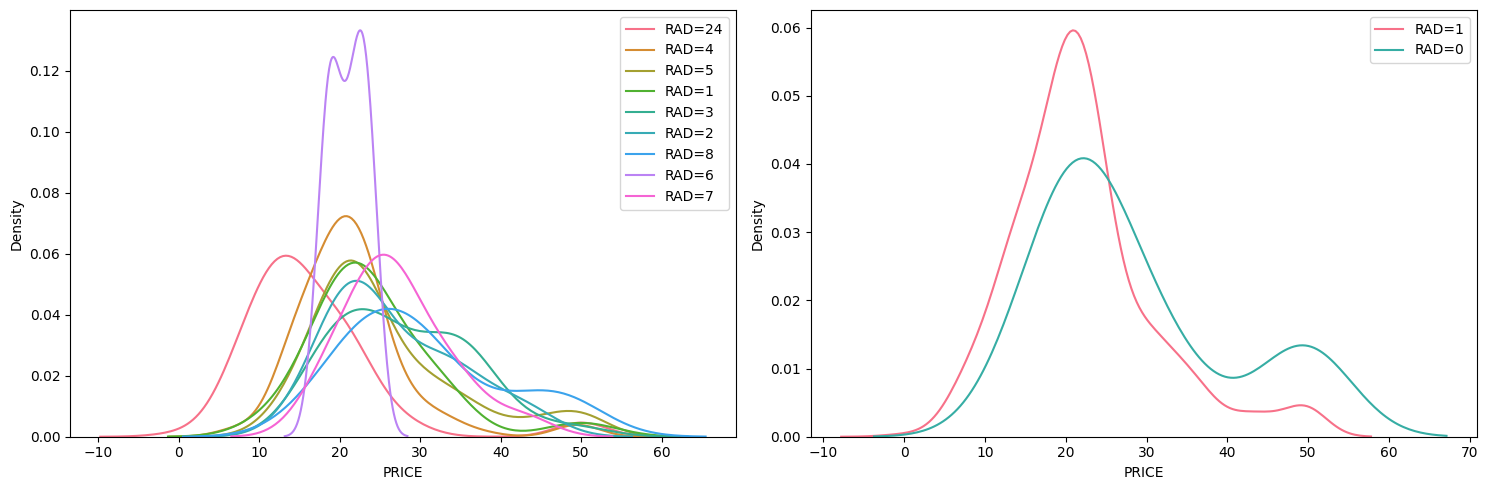

In [13]:
# Biểu đồ mật độ xác suất
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
def plot_density(data, feature, ax):
  values = data[feature].unique()
  colors = sns.color_palette("husl", len(values))
  for i, value in enumerate(values):
    subset = data[data[feature] == value]
    sns.kdeplot(x="PRICE", data=subset, ax=ax, label=f'RAD={value}', color=colors[i])
  ax.legend()

plot_density(data, "RAD", ax[0])
plot_density(data, "RIVER", ax[1])
plt.tight_layout()
plt.show()

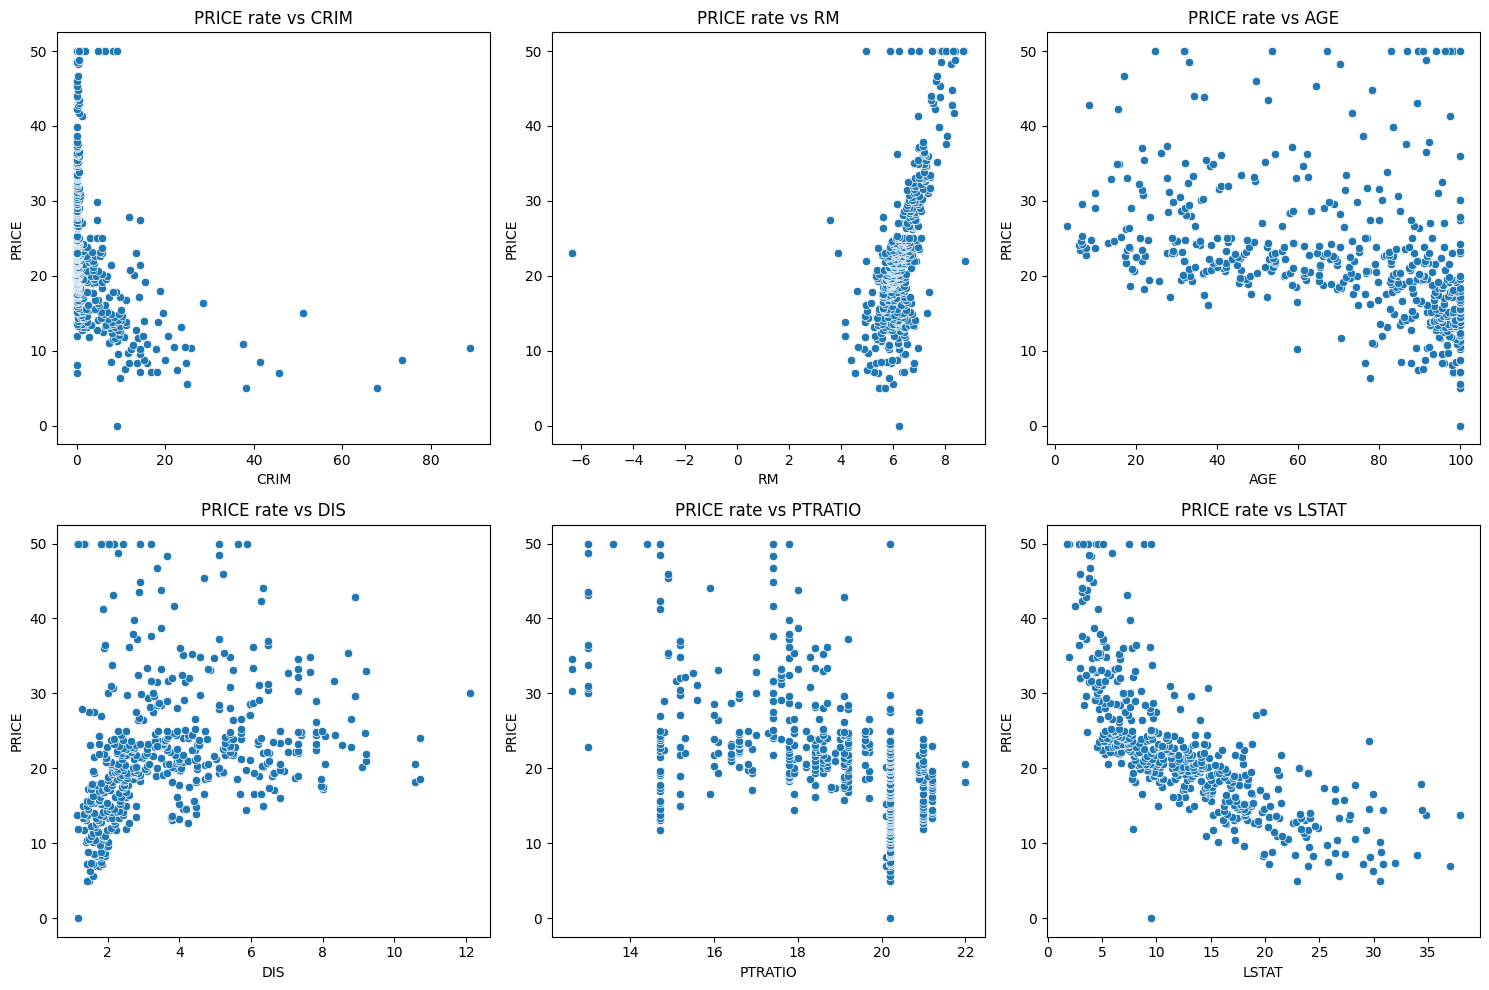

In [14]:
features = ['CRIM', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(x=feature, y="PRICE", data=data, ax=axes[row, col])
    axes[row, col].set_title(f"PRICE rate vs {feature}")

plt.tight_layout()
plt.show()

Dựa vào biểu đồ phân tán trực quan hoá nhận thấy cột RM (Số lượng phòng trong căn nhà) lại thấy có 1 giá trị bất thường RM ~ -6
Đây chắc chắn là sai sót trong quá trình nhập  liệu. Chúng ta sẽ thay thế giá trị này bằng mean (Trung bình)

In [15]:
data.loc[data.RM < 0]

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,PRICE
507,0.11425,0.0,13.89,0,0.55,-6.373,92.4,3.3633,5,16.4,10.5,23.0


In [16]:
data.loc[data.RM < 0, "RM"]= data.RM.mean()

In [17]:
data.loc[data.RM < 0]

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,PRICE


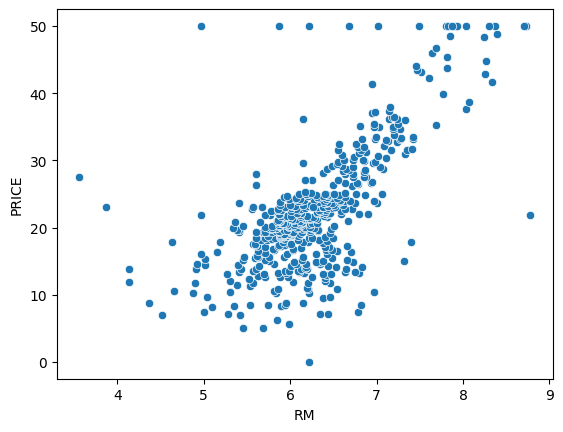

In [18]:
# Mình vẽ lại biểu đồ phân tán cho sự tương quan giữa cột RM tác động tới PRICE
# data["colors"]= np.random.choice(["red", 'blue', 'yellow', 'green', 'purple'], size=len(data))
sns.scatterplot(x="RM", y="PRICE", data=data)
plt.show()

Ngoài ra dựa vào describe() ta thấy giá trị cột CRIM phân bố không đều.
Ý tưởng: Chia giá trị của cột CRIM thành 4 và trực quan hoá lại

In [19]:
data.CRIM.describe()

,CRIM
count,508.000000
mean,3.617696
std,8.589594
min,0.006320
25%,0.082155
50%,0.256510
75%,3.681942
max,88.976200


Dữ liệu phân bố không đều: 25%: 0 - 0.08, 0.08 - 0.25, 0. 25 - 3.69, 3.69 - 89
Chia thành 4 nhóm lần lượt: Không có tội phạm, ít tội phạm, có tội phạm, rất nhiều tội phạm (0, 1, 2, 3)

In [48]:
crim_category = [0, 1, 2, 3]
quartile_crim = pd.qcut(data.CRIM, q=4, labels=crim_category)
quartile_crim_df = pd.DataFrame({"CRIM_category": quartile_crim}, index=data.index)
quartile_crim_df['PRICE'] = data.PRICE
quartile_crim_df.head(10)

,CRIM_category,PRICE
0,3,5.0
1,3,5.0
2,3,5.6
3,3,6.3
4,3,7.0
5,1,7.0
6,3,7.2
7,3,7.2
8,3,7.2
9,3,7.4


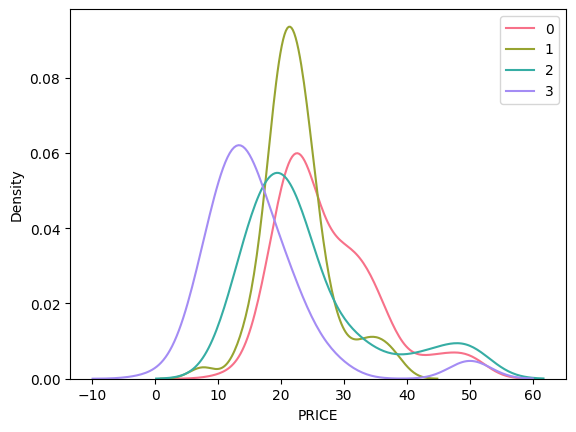

In [51]:
values = [0, 1, 2, 3]
colors = sns.color_palette("husl", len(values))
for i, value in enumerate(values):
    subset = quartile_crim_df[quartile_crim_df["CRIM_category"] == value]
    sns.kdeplot(x="PRICE", data=subset, label=f"{i}", color=colors[i])
    plt.legend()

wow, quả thật: mức độ tội phạm mức 3 thì giá nhà chủ yếu tập trung mức thấp: trên 10tr, tội phạm mức 0 thì vẫn cao nhất. Kết luận: fantastic

## Split data: train vs test

In [ ]:
# features =
# X = data.iloc[:,:11].values
# y = data.iloc[:,-1:].values